In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.shape

(2240, 29)

## 1. Data Preprocessing

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
# Missing data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# only 24 missing data, then drop na
df = df.dropna()

In [9]:
# check duplicates
df.duplicated().sum()

0

In [10]:
#transform year_birth to age
df['age'] = 2023-df['Year_Birth']

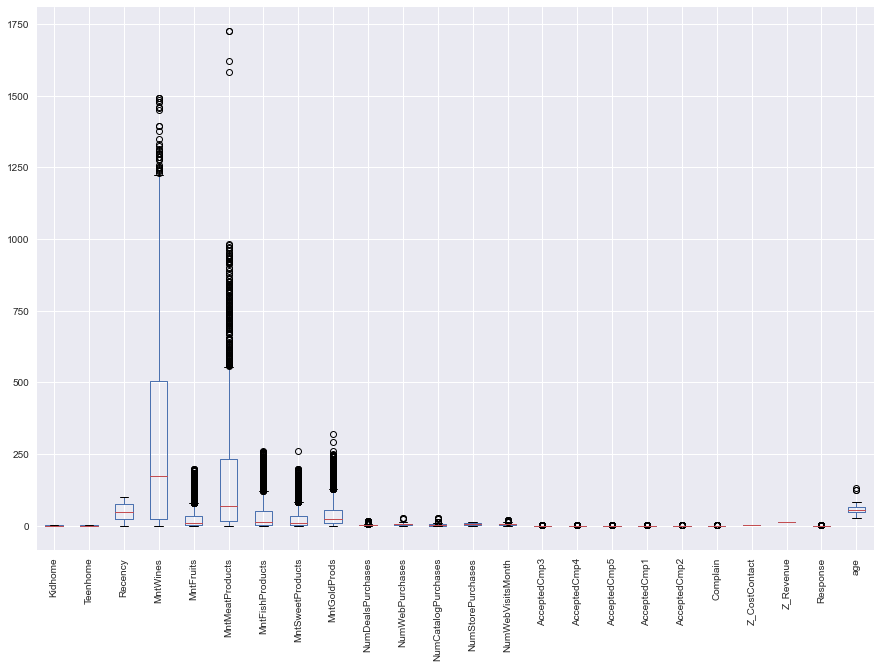

In [11]:
# check for outliers
fig, ax = plt.subplots(figsize=(15, 10))
dfbox = df.drop(['ID','Income','Year_Birth'],axis = 1)
dfbox.boxplot(ax=ax)
plt.xticks(rotation=90)
plt.show()

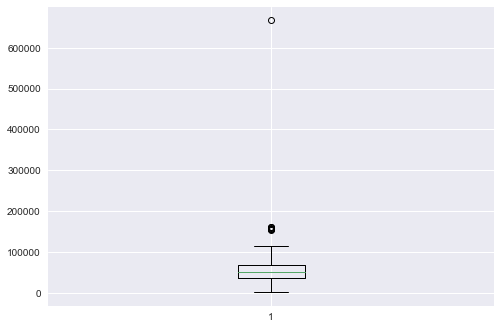

In [12]:
plt.boxplot(df['Income'])
plt.show()

In [13]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [14]:
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

In [15]:
df.shape

(2208, 30)

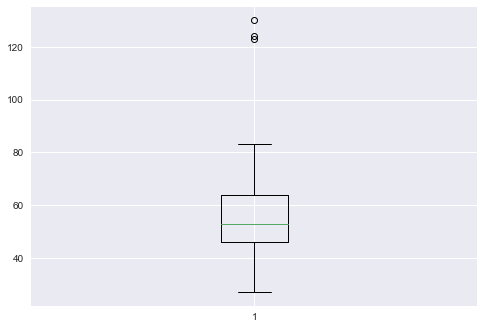

In [16]:
plt.boxplot(df['age'])
plt.show()

In [17]:
# Calculate the IQR for the Income column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the age column:", len(outliers))

Number of outliers in the age column: 3


In [18]:
df = df[~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))]

In [19]:
df.shape

(2205, 30)

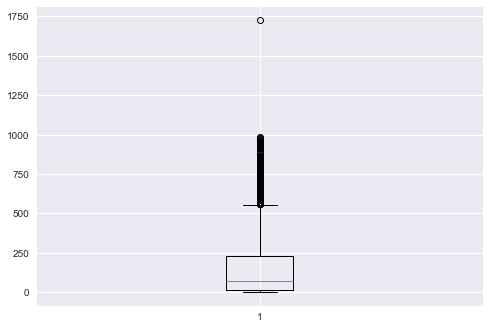

In [20]:
plt.boxplot(df['MntMeatProducts'])
plt.show()

In [21]:
df = df[df['MntMeatProducts']<=1500]
df.shape

(2204, 30)

In [22]:
#Number of accepted campaigns
df['#ofAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

In [23]:
df['#ofAcceptedCmp'].value_counts()

0    1746
1     322
2      81
3      44
4      11
Name: #ofAcceptedCmp, dtype: int64

In [24]:
#Transform Dt_customer
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
current_date = pd.to_datetime("25-02-2023", format="%d-%m-%Y")
df["Dt_Customer_Days"] = (current_date - df["Dt_Customer"]).dt.days

In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', '#ofAcceptedCmp', 'Dt_Customer_Days'],
      dtype='object')

In [26]:
#drop useless column
df1 = df.drop(['ID','Z_CostContact', 'Z_Revenue','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Response','Year_Birth','Dt_Customer'],axis = 1)

In [27]:
df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days'],
      dtype='object')

In [28]:
#Group education in 3 groups
df1['Education'] = df1['Education'].replace({'PhD':'High','Master':'High','Graduation':'High',
                                             '2n Cycle':'Low','Basic':'Middle'})
df1.Education.value_counts()

High      1952
Low        198
Middle      54
Name: Education, dtype: int64

In [29]:
#Group Marital Status in 2 groups
df1['Marital_Status'] = df1['Marital_Status'].replace({'Married':'Together','Single':'Alone','Divorced':'Alone',
                                                       'Widow':'Alone','Absurd':'Alone','YOLO':'Alone'})
df1['Marital_Status'].value_counts()

Together    1421
Alone        783
Name: Marital_Status, dtype: int64

In [30]:
#Whether is parent
df1['is_parent'] = (df1['Kidhome'] + df1['Teenhome'] > 0).astype(int)

In [31]:
#Create RFM columns
df1['Monetary'] = df1['MntWines']+ df1['MntFruits']+ df1['MntMeatProducts']+ df1['MntFishProducts']
+ df1['MntSweetProducts']+ df1['MntGoldProds']
df1['Frequency'] = df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases'] 

In [32]:
df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days', 'is_parent', 'Monetary',
       'Frequency'],
      dtype='object')

## 2. EDA

In [33]:
pd.set_option('display.max_columns', None)
df1.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,age,#ofAcceptedCmp,Dt_Customer_Days,is_parent,Monetary,Frequency
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000
mean,51644.406534,0.441924,0.506806,49.012250,306.303085,26.414701,164.604356,37.773140,27.140200,44.076679,2.312613,4.102541,2.633848,5.826225,5.338929,0.009074,54.100272,0.299456,3516.634301,0.715064,535.095281,12.562613
std,20691.244118,0.537122,0.544397,28.938292,337.507782,39.789830,215.283270,54.831482,41.136034,51.739817,1.867077,2.736650,2.746641,3.240156,2.412313,0.094848,11.706481,0.680565,202.571139,0.451487,551.586424,7.174448
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,3163.000000,0.000000,3.000000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,46.000000,0.000000,3343.000000,0.000000,50.000000,6.000000
50%,51301.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,53.000000,0.000000,3518.500000,1.000000,330.000000,12.000000
75%,68289.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,64.000000,0.000000,3692.000000,1.000000,919.750000,18.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,262.000000,321.000000,15.000000,27.000000,11.000000,13.000000,20.000000,1.000000,83.000000,4.000000,3862.000000,1.000000,2343.000000,32.000000


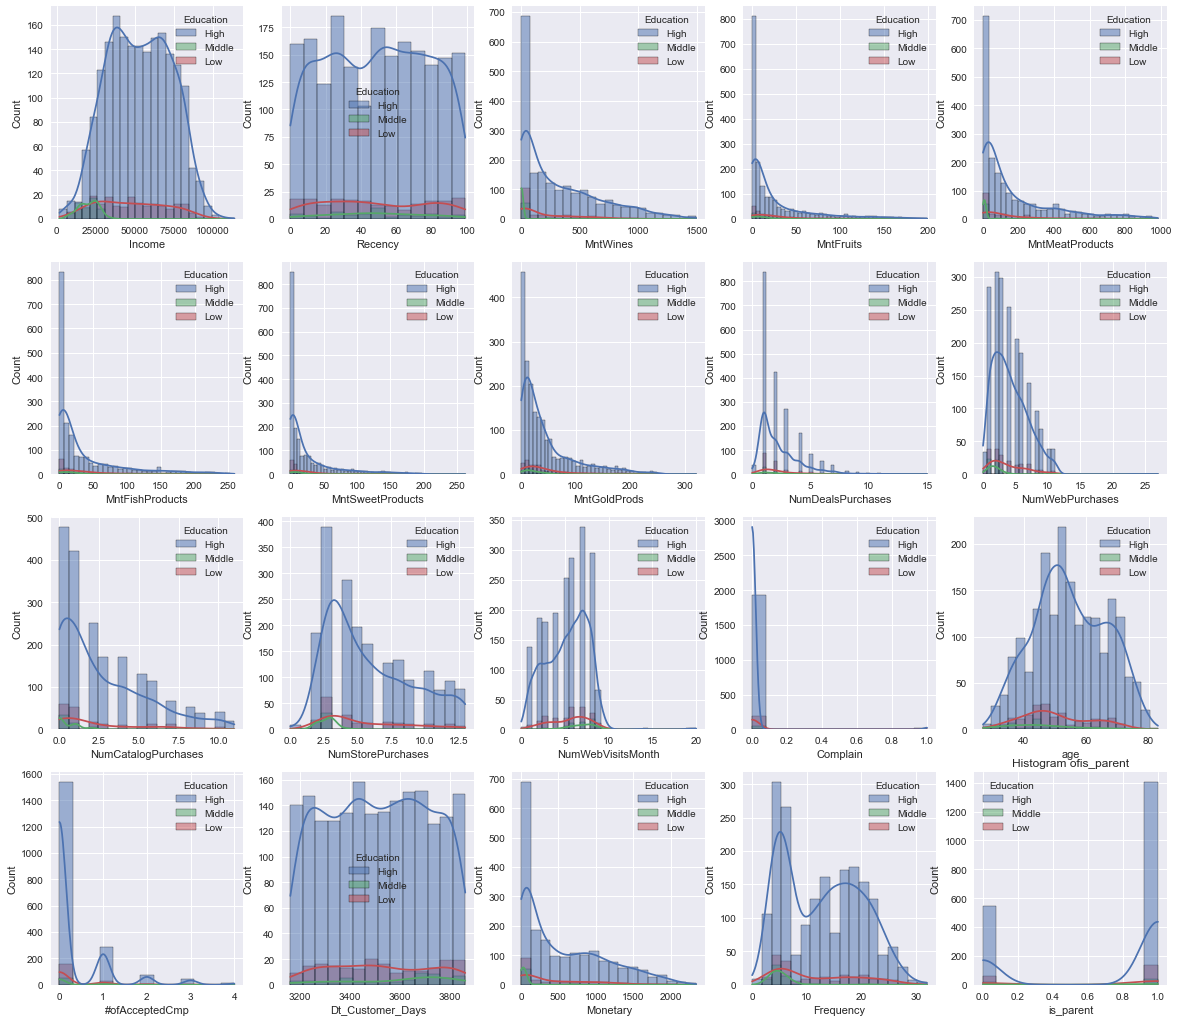

In [34]:
fig,ax=plt.subplots(4,5, figsize=(20,18))
for i,ax in zip(['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days', 'Monetary',
       'Frequency','is_parent'],ax.ravel()):
    sns.histplot(df1, x=i, hue='Education', kde=True, ax=ax)
    plt.title("Histogram of" +i)
plt.show()

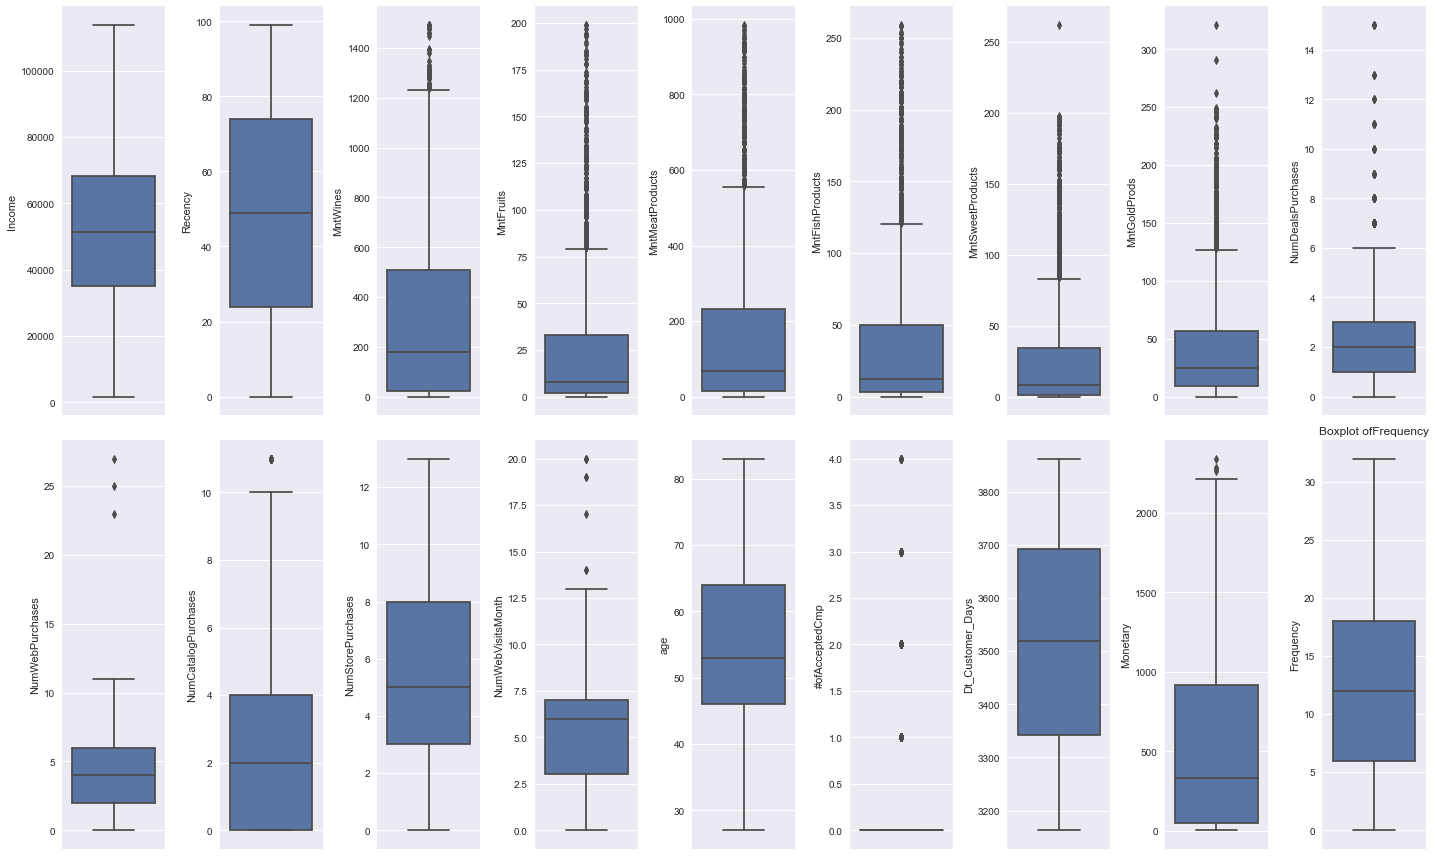

In [35]:
fig,ax=plt.subplots(2,9, figsize=(20,12))
for i,ax in zip(['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days', 'Monetary',
       'Frequency'],ax.ravel()):
    sns.boxplot(y=df1[i], ax=ax)
    plt.title("Boxplot of" +i)
plt.tight_layout()
plt.show()

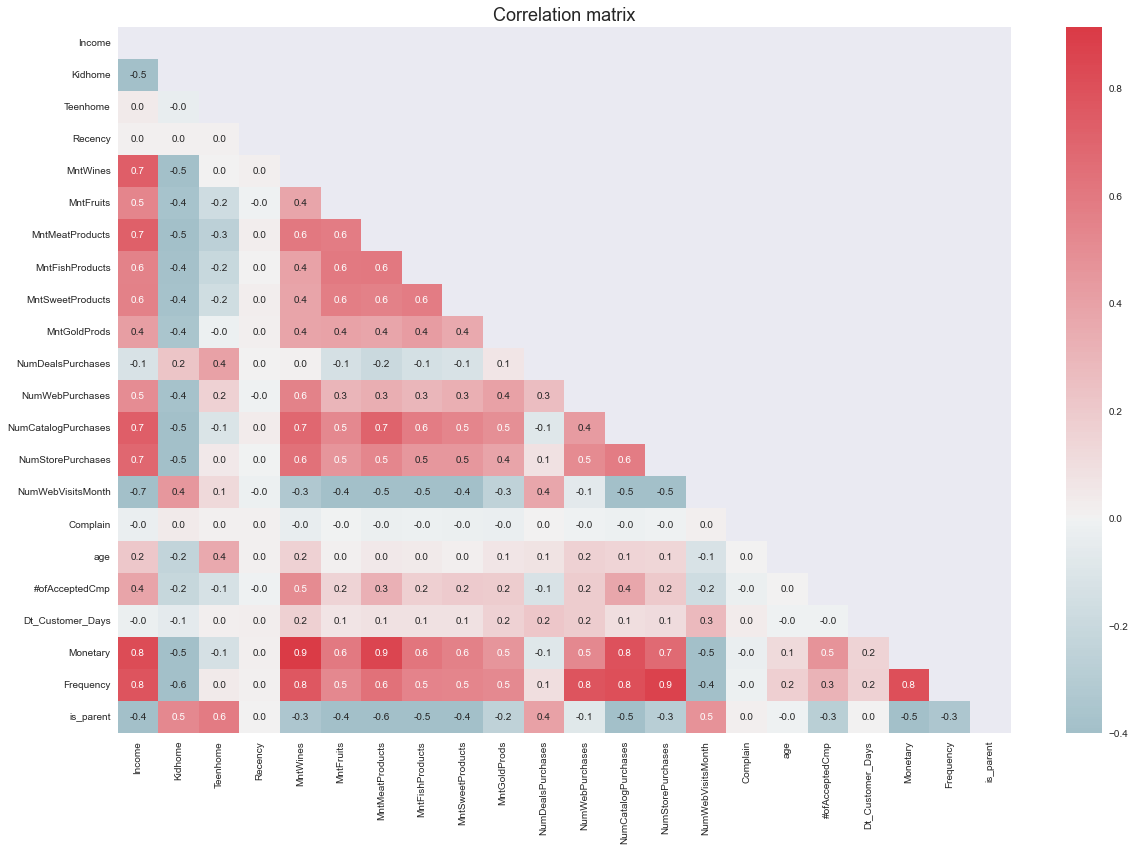

In [36]:
heatmap = df1[['Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'age',
       '#ofAcceptedCmp', 'Dt_Customer_Days', 'Monetary',
       'Frequency','is_parent','Education']]
cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(heatmap.corr())
plt.figure(figsize=(20, 13))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(heatmap.corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)
plt.show()

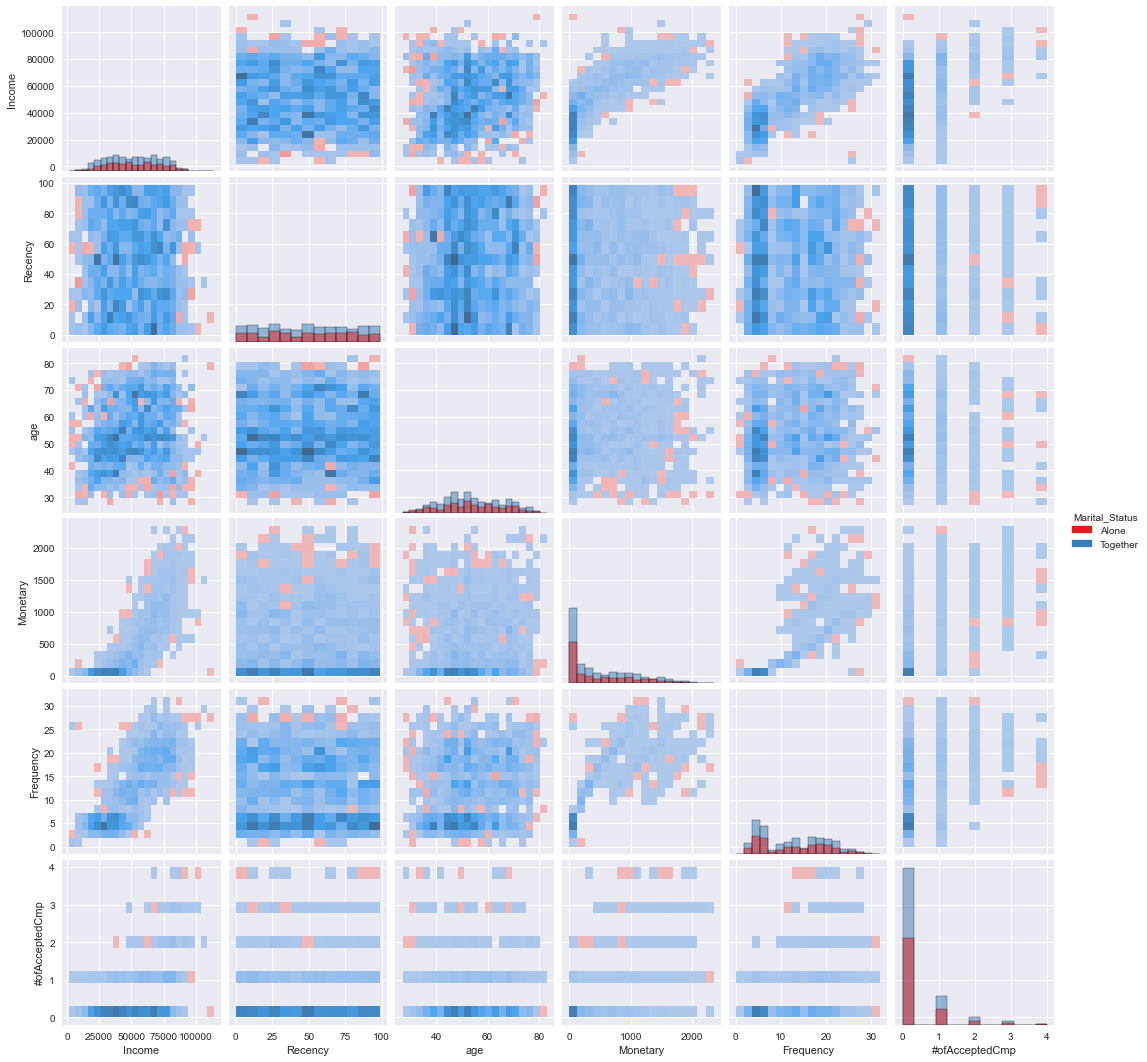

In [37]:
pairplot1 =df1[['Income', 'Recency', 'age','Monetary','Frequency', 'Marital_Status','#ofAcceptedCmp']]
sns.pairplot(pairplot1, hue='Marital_Status', palette='Set1',kind="hist")
plt.show()

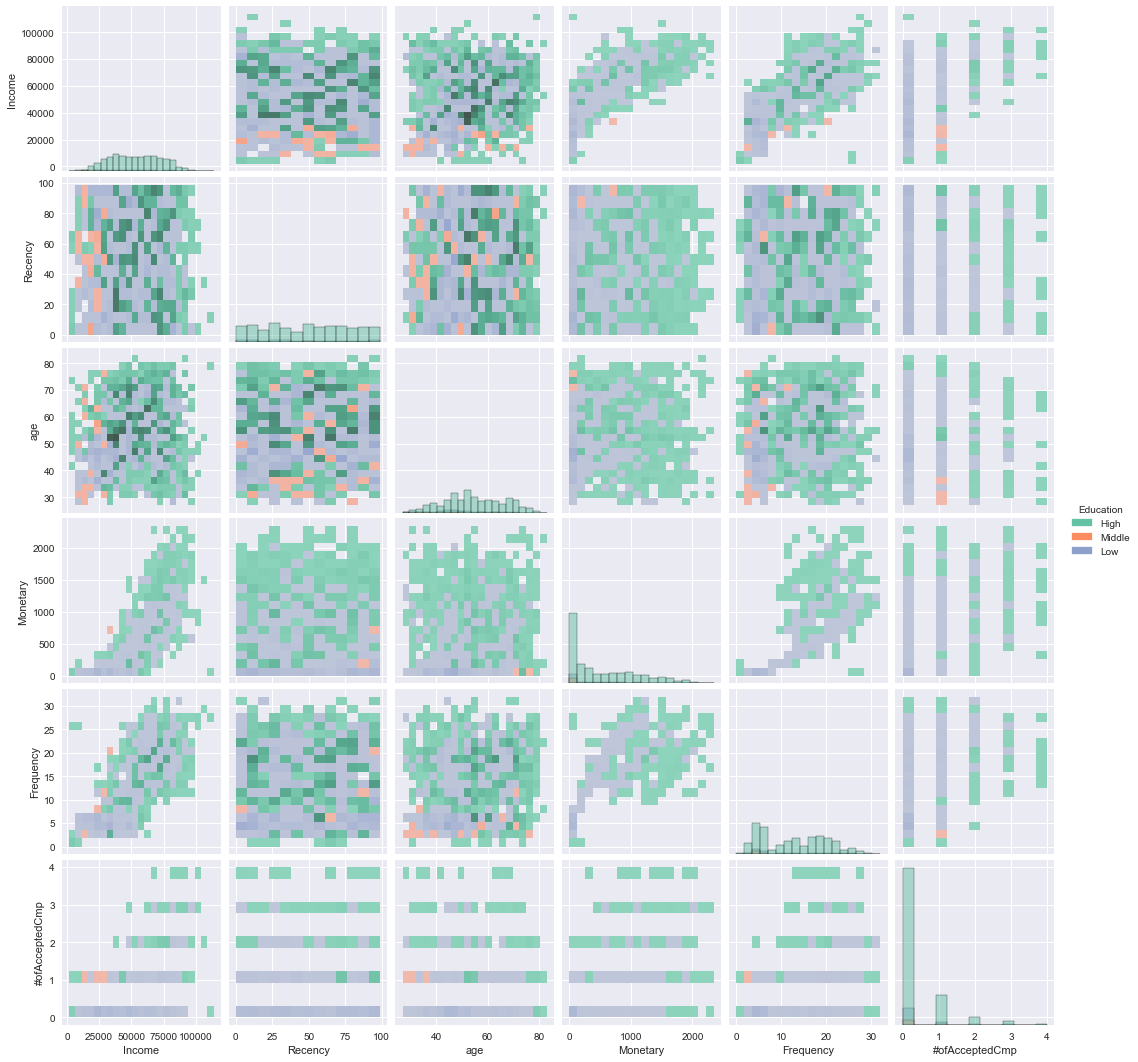

In [38]:
pairplot2 =df1[['Income', 'Recency', 'age','Monetary','Frequency', 'Education','#ofAcceptedCmp']]
sns.pairplot(pairplot2, hue='Education', palette='Set2',kind="hist")
plt.show()